# Finance Data Project
____


In this data project, i will focus on exploratory data analysis of stock prices. I'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) from 2016 to early 2022.
____

## Import the Libraries

In [1]:
#Data Manipulations
import numpy as np
import pandas as pd
import pandas_datareader as pdr
import datetime

#Data Visualizations
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#Style Visualizations
plt.style.use('ggplot')
sns.set_style('whitegrid')
%matplotlib inline

#Optional Plotly Data Viz
import plotly
import cufflinks as cf
cf.go_offline()

## Data

Getting data using pandas_datareader. We will get stock information for the following banks:
* Bank Central Asia
* Bank Mandiri
* Bank Rakyat Indonesia
* Bank Negara Indonesia
* Bank Syariah Indonesia



In [2]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2022, 1, 1)

In [6]:
#Bank Central Asia
BCA = pdr.DataReader("BBCA.JK", 'yahoo', start, end)

#Bank Mandiri
BMandiri = pdr.DataReader("BMRI.JK", 'yahoo', start, end)

#Bank Rakyat Indonesia
BRI = pdr.DataReader("BBRI.JK", 'yahoo', start, end)

#Bank Negara Indonesia
BNI = pdr.DataReader("BBNI.JK", 'yahoo', start, end)

#Bank Syariah Indonesia
BSI = pdr.DataReader("BRIS.JK", 'yahoo', start, end)

In [7]:
# Could also do this for a Panel Object
df = pdr.DataReader(['BAC', 'BMandiri', 'BRI', 'BNI', 'BSI'],'yahoo', start, end)

C:\Users\Raja Alamsyah\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'BMandiri', replacing with NaN.

C:\Users\Raja Alamsyah\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'BRI', replacing with NaN.

C:\Users\Raja Alamsyah\anaconda3\lib\site-packages\pandas_datareader\base.py:272: SymbolWarning:

Failed to read symbol: 'BNI', replacing with NaN.



In [9]:
for symbol in ['BMandiri', 'BRI', 'BNI']:
    try:
        f = pdr.DataReader(symbol, 'yahoo', "2016-01-01", "2022-01-01")
        print (f.head(5))
    except:
        print ('did not find: '+symbol)

did not find: BMandiri
did not find: BRI
did not find: BNI


**Create a list of the ticker symbols as (strings) in alphabetical order.**

In [10]:
tickers = ['BCA', 'BMandiri', 'BRI', 'BNI', 'BSI']

**Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list.**

In [11]:
bank_stocks = pd.concat([BCA, BMandiri, BRI, BNI, BSI],axis=1,keys=tickers)

**Set the column name levels:**

In [12]:
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

**Check the head of the bank_stocks dataframe.**

In [13]:
bank_stocks.head()

Bank Ticker     BCA                                                    \
Stock Info     High     Low    Open   Close       Volume    Adj Close   
Date                                                                    
2016-01-04   2685.0  2630.0  2635.0  2645.0   77479500.0  2383.917480   
2016-01-05   2710.0  2640.0  2640.0  2675.0   96609000.0  2410.956543   
2016-01-06   2700.0  2640.0  2665.0  2640.0  105370000.0  2379.410889   
2016-01-07   2630.0  2600.0  2620.0  2600.0  146746500.0  2343.359619   
2016-01-08   2620.0  2590.0  2590.0  2600.0  125820000.0  2343.359619   

Bank Ticker BMandiri                          ...     BNI                      \
Stock Info      High     Low    Open   Close  ...    Open   Close      Volume   
Date                                          ...                               
2016-01-04    4675.0  4537.5  4600.0  4625.0  ...  4990.0  4890.0  13664000.0   
2016-01-05    4775.0  4625.0  4625.0  4687.5  ...  4890.0  4950.0  26464400.0   
2016-01-06    4762.5  4675.0  4725.0  4675.0  ...  4960.0  5050.0  36383200.0   
2016-01-07    4625.0  4550.0  4575.0  4550.0  ...  5000.0  4985.0  18649900.0   
2016-01-08    4637.5  4550.0  4550.0  4637.5  ...  5000.0  5000.0  24349200.0   

Bank Ticker               BSI                                  
Stock Info     Adj Close High Low Open Close Volume Adj Close  
Date                                                           
2016-01-04   4028.607178  NaN NaN  NaN   NaN    NaN       NaN  
2016-01-05   4078.038086  NaN NaN  NaN   NaN    NaN       NaN  
2016-01-06   4160.422852  NaN NaN  NaN   NaN    NaN       NaN  
2016-01-07   4106.873047  NaN NaN  NaN   NaN    NaN       NaN  
2016-01-08   4119.229980  NaN NaN  NaN   NaN    NaN       NaN  

[5 rows x 30 columns]

In [15]:
bank_stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1508 entries, 2016-01-04 to 2021-12-30
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   (BCA, High)            1508 non-null   float64
 1   (BCA, Low)             1508 non-null   float64
 2   (BCA, Open)            1508 non-null   float64
 3   (BCA, Close)           1508 non-null   float64
 4   (BCA, Volume)          1508 non-null   float64
 5   (BCA, Adj Close)       1508 non-null   float64
 6   (BMandiri, High)       1507 non-null   float64
 7   (BMandiri, Low)        1507 non-null   float64
 8   (BMandiri, Open)       1507 non-null   float64
 9   (BMandiri, Close)      1507 non-null   float64
 10  (BMandiri, Volume)     1507 non-null   float64
 11  (BMandiri, Adj Close)  1507 non-null   float64
 12  (BRI, High)            1507 non-null   float64
 13  (BRI, Low)             1507 non-null   float64
 14  (BRI, Open)            1507 non-null  

In [16]:
bank_stocks.isnull().sum()

Bank Ticker  Stock Info
BCA          High            0
             Low             0
             Open            0
             Close           0
             Volume          0
             Adj Close       0
BMandiri     High            1
             Low             1
             Open            1
             Close           1
             Volume          1
             Adj Close       1
BRI          High            1
             Low             1
             Open            1
             Close           1
             Volume          1
             Adj Close       1
BNI          High            1
             Low             1
             Open            1
             Close           1
             Volume          1
             Adj Close       1
BSI          High          594
             Low           594
             Open          594
             Close         594
             Volume        594
             Adj Close     594
dtype: int64

# EDA

Let's explore the data a bit!

**What is the max Close price for each bank's stock throughout the time period?**

In [17]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').max()

Bank Ticker
BCA          7750.0
BMandiri     9050.0
BRI          4890.0
BNI         10175.0
BSI          3770.0
dtype: float64

**Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

In [18]:
returns = pd.DataFrame()

**Use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [19]:
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BCA Return,BMandiri Return,BRI Return,BNI Return,BSI Return
Date,,,,,
2016-01-04,NaN,NaN,NaN,NaN,NaN
2016-01-05,0.011342,0.013514,0.008715,0.012270,NaN
2016-01-06,-0.013084,-0.002667,-0.004320,0.020202,NaN
2016-01-07,-0.015152,-0.026738,-0.023861,-0.012871,NaN
2016-01-08,0.000000,0.019231,0.031111,0.003009,NaN


**Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

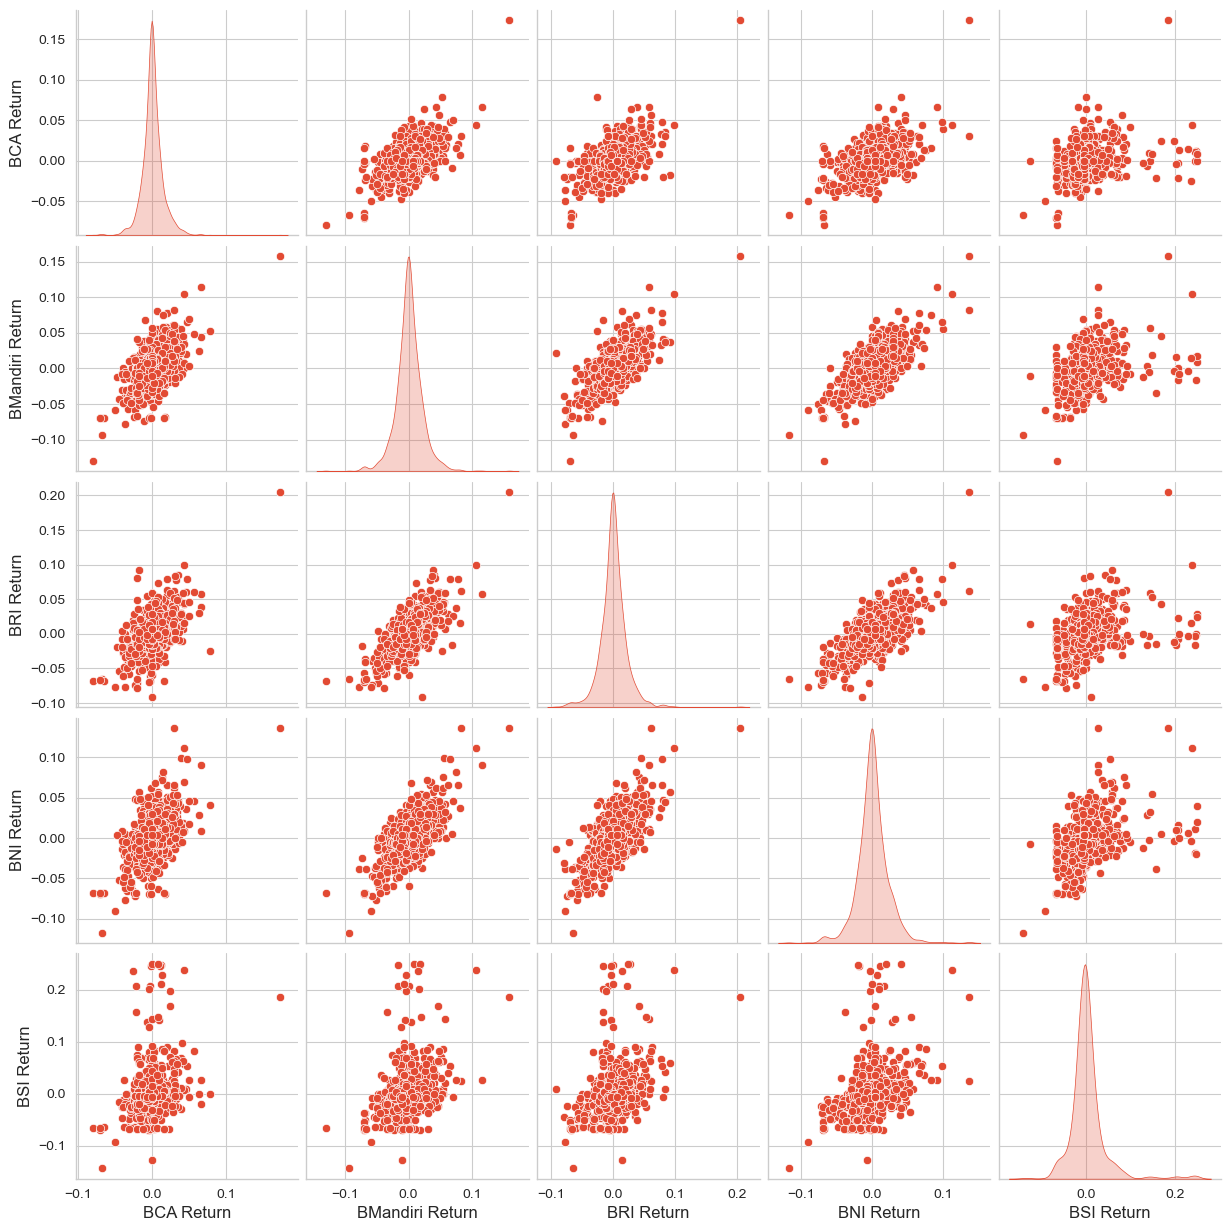

In [22]:
sns.pairplot(returns[1:], diag_kind='kde')

You'll also see the enormous crash in value if you take a look a the stock price plot (which we do later in the visualizations.)

**Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single-day returns.**

In [23]:
# Worst drop (4 of them in March 2022 when Indonesia was first hit by Covid-19)
returns.idxmin()

BCA Return        2020-03-17
BMandiri Return   2020-03-17
BRI Return        2021-08-25
BNI Return        2020-03-09
BSI Return        2020-03-09
dtype: datetime64[ns]

In [24]:
# Best Single Day Gain
returns.idxmax()

BCA Return        2020-03-26
BMandiri Return   2020-03-26
BRI Return        2020-03-26
BNI Return        2020-06-08
BSI Return        2020-10-13
dtype: datetime64[ns]

**Look at the standard deviation of returns, which stocks would be classed as riskiest over that period? Which will be classified as the riskiest for 2020?**

In [25]:
returns.std() # Bank Syariah Indonesia riskiest

BCA Return         0.014695
BMandiri Return    0.020944
BRI Return         0.020902
BNI Return         0.021668
BSI Return         0.041118
dtype: float64

In [28]:
returns.loc['2020-01-01':'2020-12-31'].std() # The risk profile is very similar, between Mandiri and BRI with a standard division return value

BCA Return         0.024139
BMandiri Return    0.033315
BRI Return         0.033435
BNI Return         0.034190
BSI Return         0.063997
dtype: float64

**Create a histplot using seaborn of the 2020 returns for Bank Mandiri.**

<AxesSubplot: xlabel='BMandiri Return', ylabel='Count'>

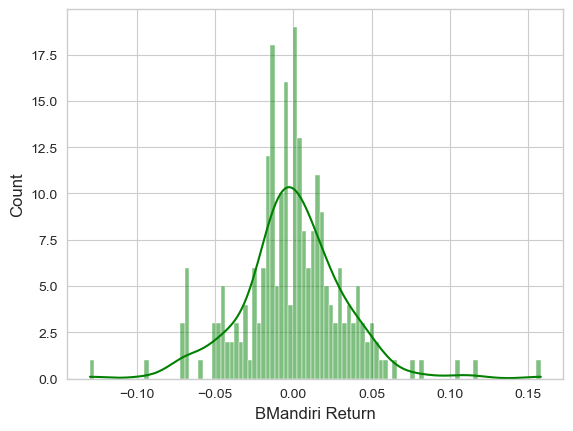

In [31]:
sns.histplot(returns.loc['2020-01-01':'2020-12-31']['BMandiri Return'],color='green',bins=100, kde=True)

**Create a histplot using seaborn of the 2008 returns for Bank Syariah Indonesia**

<AxesSubplot: xlabel='BSI Return', ylabel='Count'>

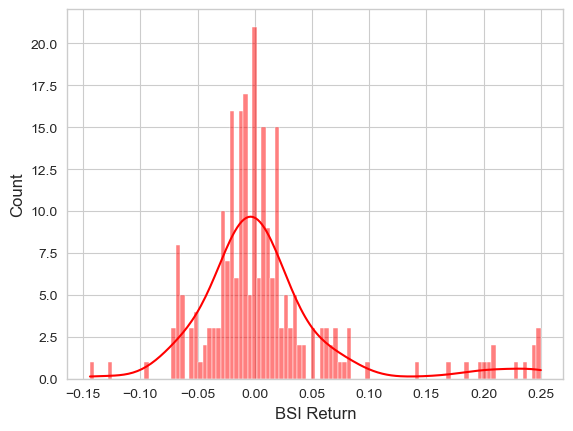

In [32]:
sns.histplot(returns.loc['2020-01-01':'2020-12-31']['BSI Return'],color='red',bins=100, kde=True)

____
# More Visualization

A lot of this project will focus on visualizations and now use plotly and cufflinks libraries.

**Create a line plot showing Close price for each bank for the entire index of time.**

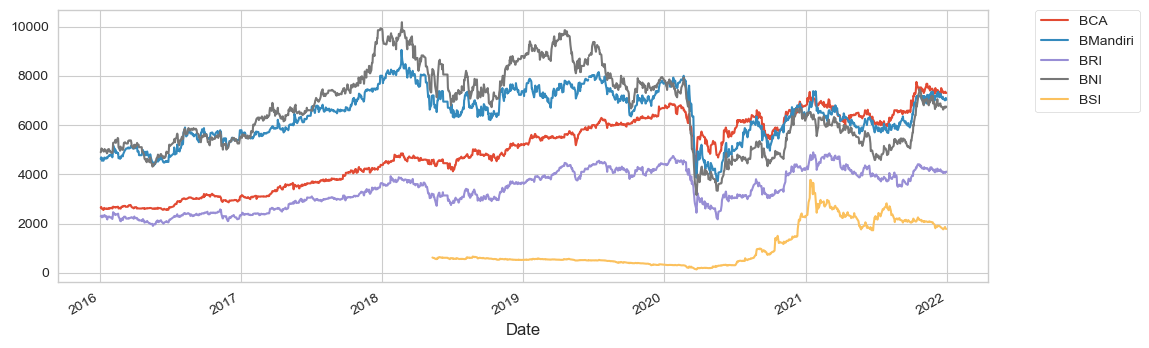

In [52]:
for tick in tickers:
    bank_stocks[tick]['Close'].plot(figsize=(12,4),label=tick)
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

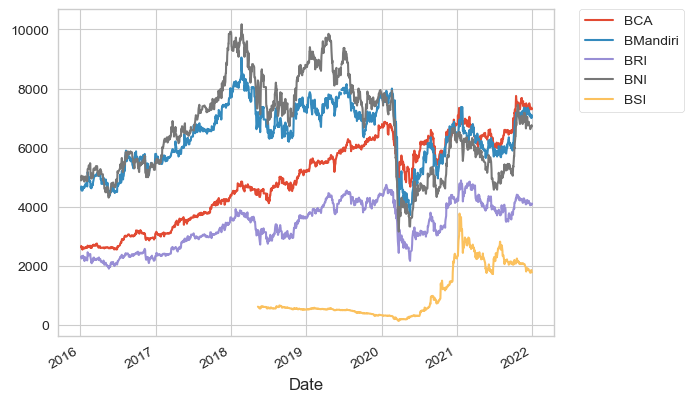

In [53]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [54]:
# plotly
bank_stocks.xs(key='Close',axis=1,level='Stock Info').iplot()

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2020. 

**Plot the rolling 30 day average against the Close Price for Bank Central Asia stock for the year 2020**

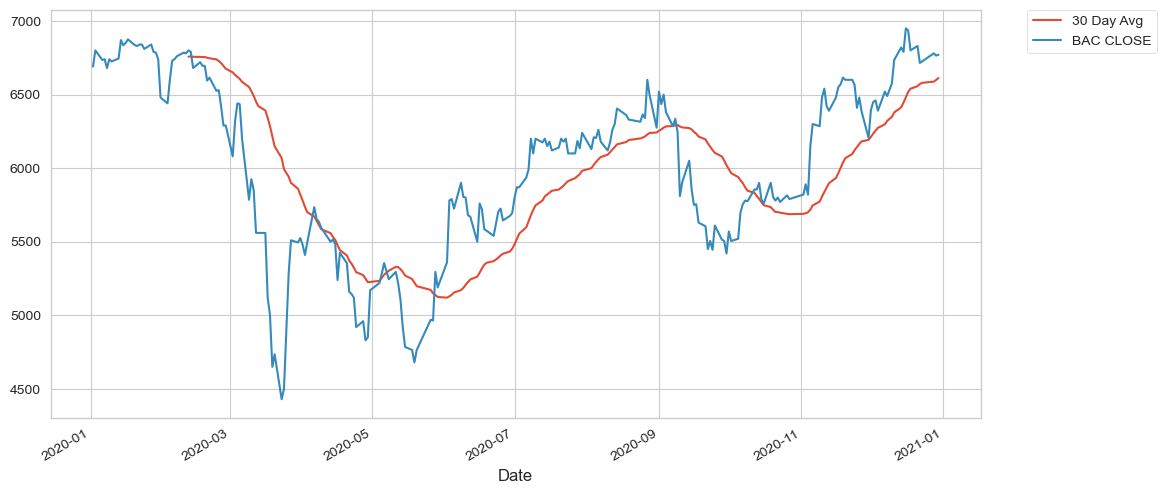

In [55]:
plt.figure(figsize=(12,6))
BCA['Close'].loc['2020-01-01':'2021-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BCA['Close'].loc['2020-01-01':'2021-01-01'].plot(label='BAC CLOSE')
plt.legend()
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

** Create a heatmap of the correlation between the stocks Close Price.**

<AxesSubplot: xlabel='Bank Ticker', ylabel='Bank Ticker'>

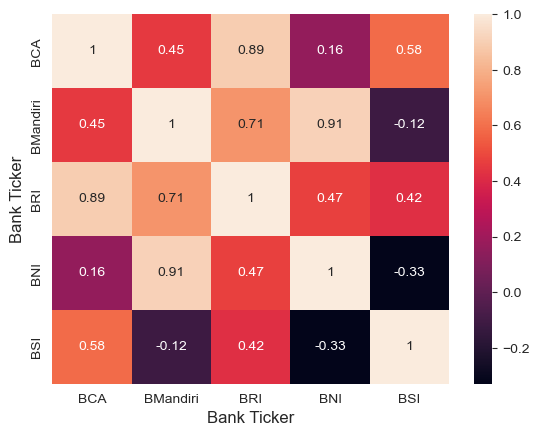

In [56]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

** Optional: Use seaborn's clustermap to cluster the correlations together:**

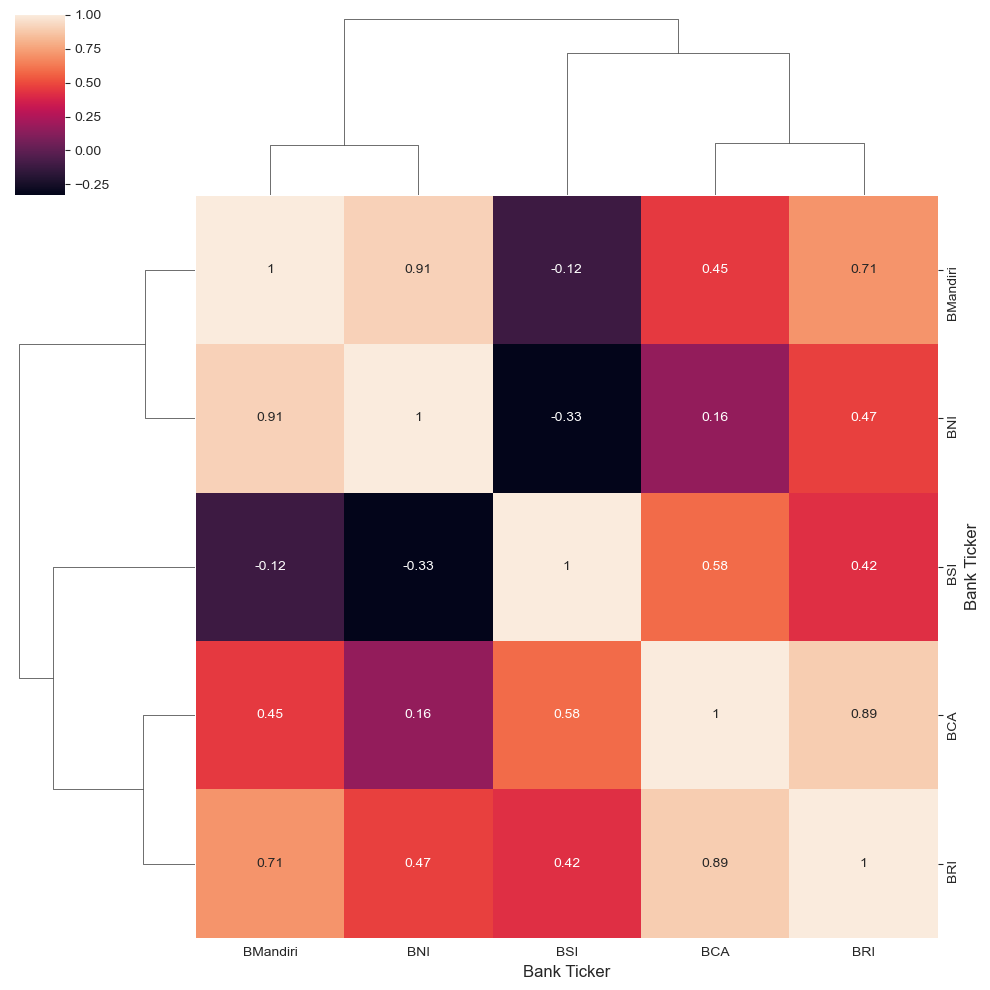

In [57]:
sns.clustermap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

In [58]:
close_corr = bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr()
close_corr.iplot(kind='heatmap',colorscale='rdylbu')

# Part 2 (Optional)

In this second part of the project i will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project.

**Use .iplot(kind='candle) to create a candle plot of Bank Central Asia stock from Jan 1st 2020 to Jan 1st 2022.**

In [61]:
BCA[['Open', 'High', 'Low', 'Close']].loc['2020-01-01':'2022-01-01'].iplot(kind='candle')

**Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Bank Syariah Indonesisa for the year 2020.**

In [63]:
BSI['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='sma',periods=[13,21,55],title='Simple Moving Averages')

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank Central Asia for the year 2020.**

In [64]:
BCA['Close'].loc['2020-01-01':'2021-01-01'].ta_plot(study='boll')